In [1]:
from sn_line_vel.SpectrumSN import SpectrumSN

import pymc as pm
import numpy as np

# read spec data
z = 0.0307 #redshift
spec = './test_data/ZTF20aayhacx_20200513_NOT_v4.ascii' #spec file
Spec1 = SpectrumSN(spec, z, spec_resolution=5000/360)

# Si II

### Display the absorption feature

<AxesSubplot:>

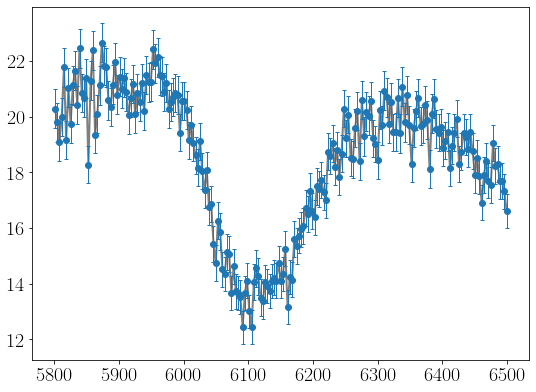

In [2]:
Spec1.plot_line_region(5800, 6500)

### Add absorption lines

We fit the hallmark features of SNe Ia - the Si II $\lambda$6355 doublet. The edges of the absorption features are manually selected - in this case, we use 5930--6330 angstroms. With `LS_estimator()`, we obtain the MLE with the least square method.

In [3]:
Spec1.add_line('SiII_6355', 5930, 6330, lines=[6371.359, 6347.103], rel_strength=[1, 1])
Spec1.line['SiII_6355'].LS_estimator((1, 1, -10000, 8, -1000))

LS estimation:
Velocity 1: -11887 km/s


Then we sample the posterior with a No-U-Turn Sampler (NUTS). The prior of the velocity profile has to be externally specified - a Gaussian prior is adopted, so one might specify $\mu$ and $\sigma$.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [blue_fl, red_fl, A, v_mean, ln_v_sig, sigma_0]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 21 seconds.


                mean       sd    hdi_16%    hdi_84%  mcse_mean  mcse_sd  \
v_mean[0] -11864.434   90.100 -11947.435 -11769.686      2.002    1.416   
v_sig[0]    3297.528  117.434   3177.940   3411.068      2.908    2.057   
A[0]       -2596.333  125.624  -2712.170  -2465.545      3.280    2.323   
sigma_0        0.015    0.009      0.003      0.021      0.000    0.000   
EW_0          63.200    2.592     60.698     65.828      0.067    0.048   

           ess_bulk  ess_tail  r_hat  
v_mean[0]  2024.867  2299.214  1.003  
v_sig[0]   1632.729  2138.097  1.003  
A[0]       1477.578  1879.825  1.004  
sigma_0    1189.611   973.442  1.001  
EW_0       1492.029  1931.113  1.003  


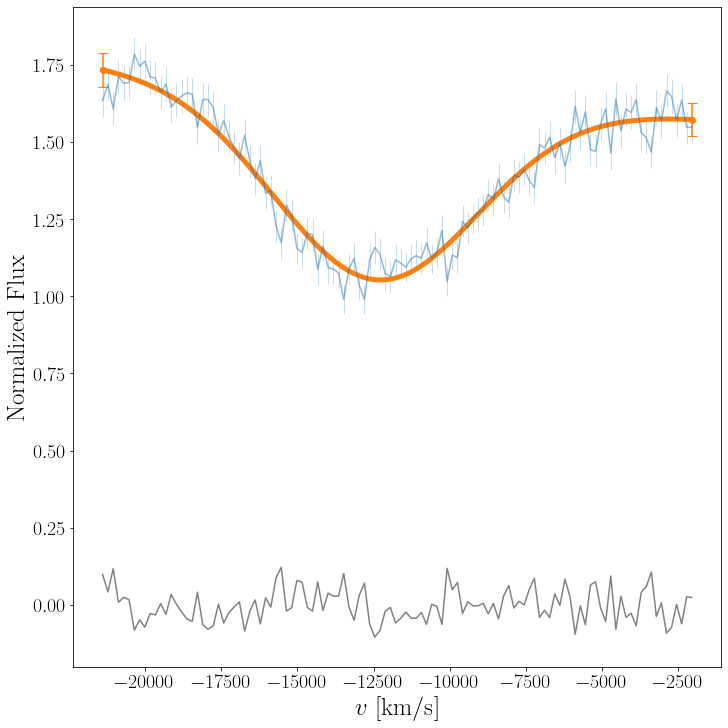

In [4]:
trace_SiII, Model_SiII, ax = Spec1.line["SiII_6355"].MCMC_sampler(
    vel_mean_mu=[-1e4],
    vel_mean_sig=[3e3],
    ln_vel_sig_mu=np.log([3e3]),
    ln_vel_sig_sig=[1],
)

# Ca II IRT

This script is also able to fit different velocity components simultaneously.

<AxesSubplot:>

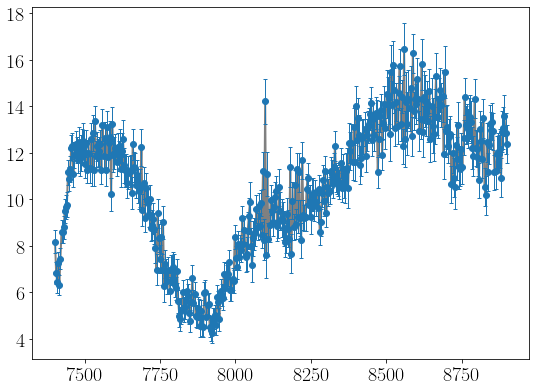

In [5]:
Spec1.plot_line_region(7400, 8900)

Many SNe Ia show two velocity components of Ca II infrared triplet (IRT). The `AbsorbLine` class also enables us to fit lines with different velocities simultaneously.

In [6]:
Spec1.add_line('CaII_IRT/CaII_IRT',
               7500,
               8650,
               lines=[[8498.018, 8542.089, 8662.140],
                      [8498.018, 8542.089, 8662.140]],
               rel_strength=[[1, 1, 1], [1, 1, 1]])
Spec1.line['CaII_IRT/CaII_IRT'].LS_estimator(guess=(1, 1, -25000, 8, -1000,
                                                    -12000, 8, -1000))

LS estimation:
Velocity 1: -24506 km/s
Velocity 2: -11212 km/s


## NUTS

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [blue_fl, red_fl, A, v_mean, ln_v_sig, sigma_0]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 32 seconds.


                mean       sd    hdi_16%    hdi_84%  mcse_mean  mcse_sd  \
v_mean[0] -24522.022  130.312 -24630.273 -24384.028      3.235    2.291   
v_mean[1] -11355.209  285.643 -11610.504 -11067.079      7.472    5.309   
v_sig[0]    4083.766  180.451   3903.954   4257.064      4.995    3.532   
v_sig[1]    3267.186  407.461   2820.013   3580.284     10.626    7.658   
A[0]       -2530.222   95.362  -2619.802  -2431.570      2.807    1.990   
A[1]       -1008.841   95.689  -1084.399   -909.173      2.489    1.783   
sigma_0        0.027    0.006      0.023      0.033      0.000    0.000   
EW_0         195.476    6.614    189.321    202.130      0.202    0.143   
EW_1          77.920    7.046     70.811     83.715      0.187    0.134   

           ess_bulk  ess_tail  r_hat  
v_mean[0]  1713.157  1561.314  1.001  
v_mean[1]  1528.814  1651.456  1.003  
v_sig[0]   1312.574  1833.621  1.006  
v_sig[1]   1572.350  1439.691  1.003  
A[0]       1133.249  1770.852  1.006  
A[1]       1581

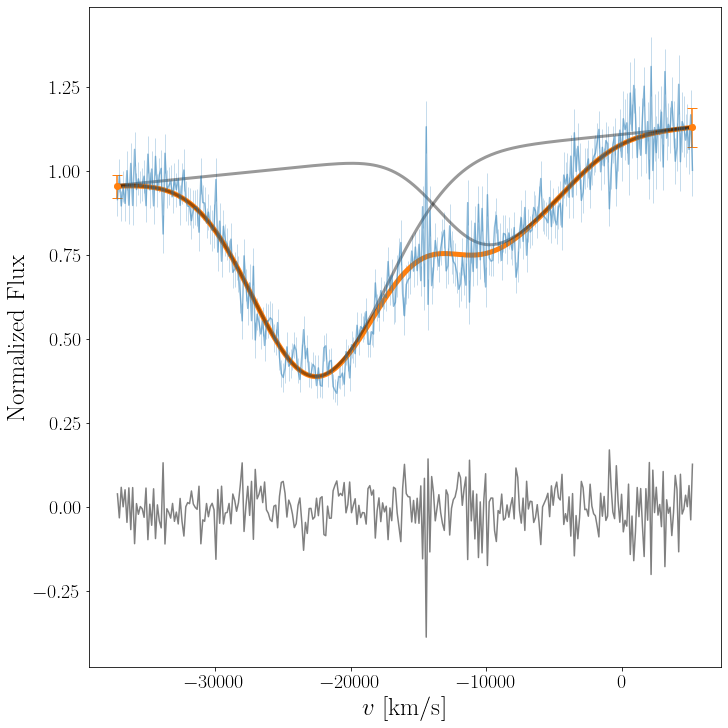

In [9]:
trace_CaII, Model_CaII, ax = Spec1.line["CaII_IRT/CaII_IRT"].MCMC_sampler(
    vel_mean_mu=[-2.5e4, -1.0e4],
    vel_mean_sig=[3e3, 3e3],
    ln_vel_sig_mu=np.log([3e3, 3e3]),
    ln_vel_sig_sig=[1, 1],
)

## Metropolis-Hastings

With the NUTS sampler, we can obtain a effective sample size (ESS) a factor of $\sim$$50$ greater than that obtained using M-H sampler.

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [blue_fl]
>Metropolis: [red_fl]
>Metropolis: [A]
>Metropolis: [v_mean]
>Metropolis: [ln_v_sig]
>Metropolis: [sigma_0]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 18 seconds.


                mean       sd    hdi_16%    hdi_84%  mcse_mean  mcse_sd  \
v_mean[0] -24554.876  133.564 -24686.742 -24416.131     15.852   11.256   
v_mean[1] -11393.458  283.067 -11704.816 -11141.824     25.476   18.089   
v_sig[0]    4046.404  157.344   3917.310   4229.464     29.568   21.180   
v_sig[1]    3424.843  408.561   3010.620   3742.549    103.299   74.450   
A[0]       -2516.503   80.242  -2602.487  -2445.327     14.303   10.215   
A[1]       -1049.222   98.477  -1117.330   -937.023     27.536   19.933   
sigma_0        0.027    0.006      0.023      0.033      0.000    0.000   
EW_0         194.037    5.617    189.556    200.266      1.116    0.799   
EW_1          80.869    7.147     73.137     86.217      1.985    1.437   

           ess_bulk  ess_tail  r_hat  
v_mean[0]    72.188   258.660  1.056  
v_mean[1]   123.294   204.826  1.028  
v_sig[0]     28.661    85.397  1.107  
v_sig[1]     15.581    89.531  1.179  
A[0]         33.183    70.758  1.105  
A[1]         12

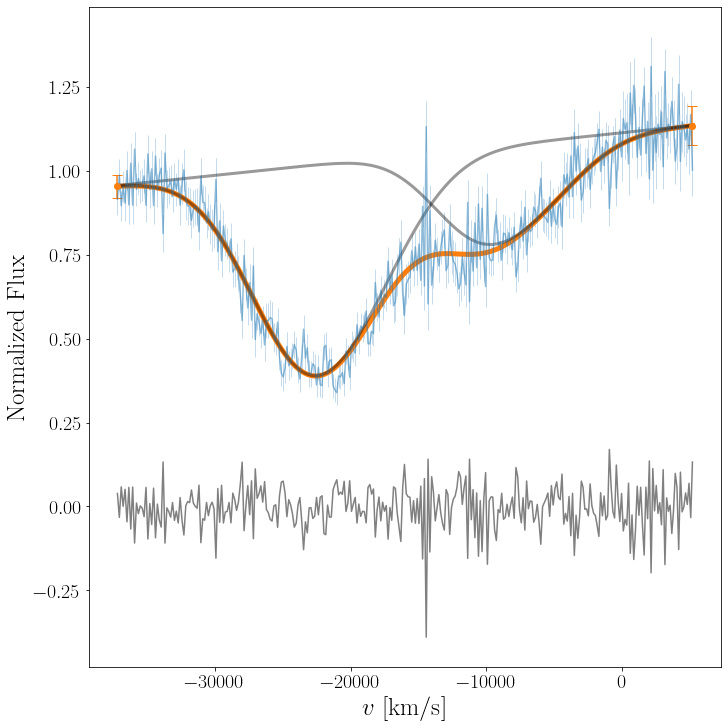

In [10]:
trace_CaII, Model_CaII, ax = Spec1.line["CaII_IRT/CaII_IRT"].MCMC_sampler(
    vel_mean_mu=[-2.5e4, -1.0e4],
    vel_mean_sig=[3e3, 3e3],
    ln_vel_sig_mu=np.log([3e3, 3e3]),
    ln_vel_sig_sig=[1, 1],
    sampler="MH"
)

### A graphic model

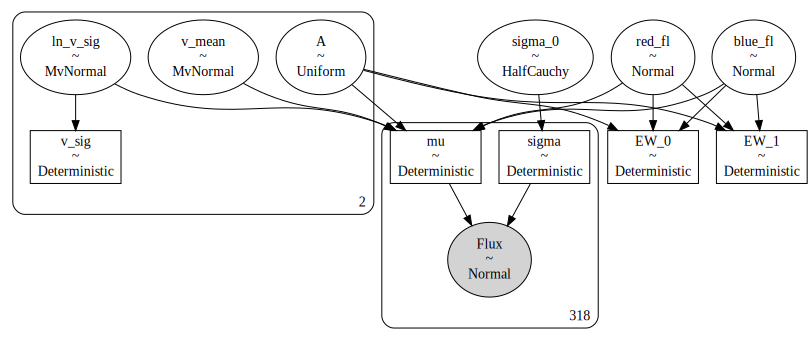

In [ ]:
pm.model_to_graphviz(Model_CaII)